### CAR NK WT dist with different weights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm,norm
from scipy.optimize import minimize
from scipy.stats import lognorm, truncnorm

In [2]:
def adding_prob_dens(df):
    df['nmbr_mcule'] =10**(0.9837*np.log10(df.iloc[:,0]) + 3.0402)
    total = df['Count'].sum()
    df['prob'] = df['Count']/df['Count'].sum()
    return df

# for 50 %

In [3]:
data_path = '/Users/sxa126/NCH Dropbox/Saeed Ahmad/CAR_NK_model/CAR_NK_Python/data_cleaning'

In [ ]:

CAR_frac = 0.5
df_WT = pd.read_excel(f'{data_path}/WT 022.xlsx',sheet_name='WT 022_CAR')
df0 = df_WT.sample(frac=1-CAR_frac, random_state=0)
df_CAR = pd.read_excel(f'{data_path}/CAR-NK 022.xlsx',sheet_name='WT 022_CAR')
df1 = df_CAR.sample(frac=CAR_frac, random_state=0)
df = (pd.concat([df0,df1])).sort_values(by='MFI',ignore_index=True)
df = df.reset_index()
df = df[(df['MFI']>0) & (df['MFI']<150)]
WT_MFI = adding_prob_dens(df)
print(len(WT_MFI))
WT_MFI = WT_MFI[WT_MFI['Count']>0]
print(len(WT_MFI))
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize = (12,6))
ax0.plot(df_WT['MFI'],df_WT['Count'])
ax0.set_xlim(-1,10)
ax1.plot(df_CAR['MFI'],df_CAR['Count'])
ax1.set_xlim(-1,150)
ax2.plot(WT_MFI['MFI'],WT_MFI['Count'])
ax2.set_xlim(-1,150)
ax2.set_ylim(0,100)
plt.show()

             MFI  Count  Unnamed: 2  Unnamed: 3  \
0      -1.309423      0         NaN         NaN   
1      -1.300804      0         NaN         NaN   
2      -1.292187      0         NaN         NaN   
3      -1.283574      0         NaN         NaN   
4      -1.274963      0         NaN         NaN   
...          ...    ...         ...         ...   
4091  992.579005      0         NaN         NaN   
4092  994.058786      0         NaN         NaN   
4093  995.540772      0         NaN         NaN   
4094  997.024968      0         NaN         NaN   
4095  998.511376      0         NaN         NaN   

                                Unnamed: 4  
0                                      NaN  
1                                      NaN  
2     regression: y = 10^( 0.9837x+3.0402)  
3                                      NaN  
4                           y = molecules   
...                                    ...  
4091                                   NaN  
4092                       

NameError: name 'sa' is not defined

135916.79697640467
136204.78215016506
129069.56744772245
136362.72334002052
135919.04765688558
135815.99679733007
132888.31896305928
131541.3516373829
130199.33197626655
128089.64047315232
124708.01998916891
124171.87709674063
119545.38211875426
121355.50329664895
118948.36610056297
114122.3687599444
114286.1725338347
110806.88561671849
105349.6184984438
106554.71954913384
104732.70820372419
100920.0514449416
99779.47113371837
96098.62669298463
98544.73773103503
96927.08753968052
99881.0268673822
104233.7414931699
98590.18210541009
103028.4270704907
98437.31698775674
97316.33715014892
99421.69902494684
97429.60054787205
95472.30637779688
94245.74056809145
94093.91435785138
94032.02042814033
93805.45078660807
92718.69249687495
95444.20538128533
92348.73009779397
91466.46642302914
91740.04008299965
91508.80095892085
91117.93977075124
92399.17044358283
92469.50951812562
90503.19678001132
90685.0043194317
92031.69135883321
90956.94349249864
93383.9662393881
90996.04675514615
90156.45202304

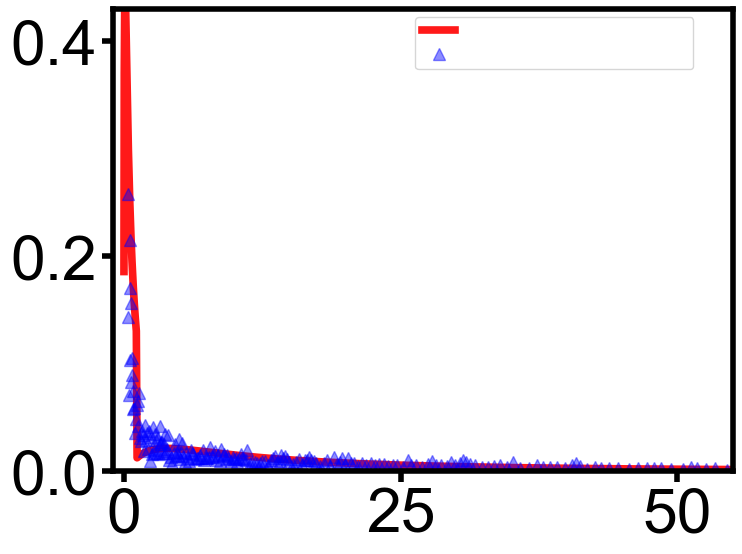

In [4]:
lim1, lim2, lim3 = WT_MFI['MFI'].min(), 1.14, WT_MFI['MFI'].max()
num = WT_MFI['MFI'].values
num = np.insert(num,0,0)
step = 5
num_indx = (np.linspace(0,len(num)-1,int(len(num)/step))).astype(int)
nmbr = []
for i in num_indx:
    nmbr.append(num[i])
num = np.array(nmbr)
x = (num[1:]+num[:-1])/2
bin_range = num
size = WT_MFI['Count'].sum()

lb1, ub1 = lim1, lim2
lb2, ub2 = lim2, lim3

e_num = np.repeat(WT_MFI['MFI'].values,WT_MFI['Count'].values)
count = np.array([np.sum((e_num > num[i]) & (e_num <= num[i+1])) for i in range(len(num)-1)])
def log_likelihood(params):
    mu1, sigma1, mu2, sigma2, w = params
    p1 = lognorm.pdf(x, sigma1, scale=np.exp(mu1))
    p2 = lognorm.pdf(x, sigma2, scale=np.exp(mu2))
    p1[(x < lb1) | (x > ub1)] = 0
    p2[(x < lb2) | (x > ub2)] = 0
    likelihood = (1 - w) * p1 + w * p2
    likelihood = -np.sum(count * np.log(likelihood))
    print(likelihood)
    return likelihood
# Optimization
initial_guess = np.array([0.10454514, 0.85912005, 2.86683666, 1.12676476, 0.3935105 ])
bounds = [(0.01, 1.5), (0.1, 1.5), (1, 6), (0.1, 2), (0.3, 0.5)]
result = minimize(log_likelihood, initial_guess, method='Nelder-Mead', bounds=bounds)
params = result.x
print(params.tolist())
#params = np.array([0.10454514, 0.85912005, 2.86683666, 1.12676476, 0.3935105 ])
mu1, sigma1, mu2, sigma2, w = params

print(f"mu1: {mu1}, sigma1: {sigma1}, mu2: {mu2}, sigma2: {sigma2}, w:{w}")
plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 4
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=4)
x_values = x #np.linspace(min(x), max(x), num=1000)
p1_fitted = lognorm.pdf(x_values, sigma1, scale=np.exp(mu1))
p2_fitted = lognorm.pdf(x_values, sigma2, scale=np.exp(mu2))
p1_fitted[(x_values < lb1) | (x_values > ub1)] = 0
p2_fitted[(x_values < lb2) | (x_values > ub2)] = 0
mixture_fitted = (1 - w) * p1_fitted + w * p2_fitted
pdf = count/(sum(count)*(bin_range[1:]-bin_range[:-1]))

#plt.hist(x, bins=bin_range, density=True, weights=count, label='Data', color = 'blue')
#plt.plot(x_values, p1_fitted, label='Fitted Lognormal Distribution p1', color='red')
#plt.plot(x_values, p2_fitted, label='Fitted Lognormal Distribution p2', color='blue')
plt.plot(x_values, mixture_fitted, label='Fitted Mixture Distribution', color='red',alpha=0.9,lw =5.5)
plt.plot(x,pdf,'^',markersize = 8,color='blue',alpha=0.45, label='Data')
t_size = 45
plt.xticks([0,25,50],fontname="Arial",fontsize = t_size)
plt.yticks([0.0,0.2,0.4],fontname="Arial",fontsize = t_size)
#plt.xlabel('x')
#plt.yscale('log')
plt.xlim(-1,55)
plt.ylim(0,0.43)
#plt.ylabel('Density')
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=12, loc='upper right', labelcolor='white')
#plt.title('Fitted Mixture of Two Lognormal Distributions with Truncation')
plt.show()

# for 75 % CAR

2661
1945


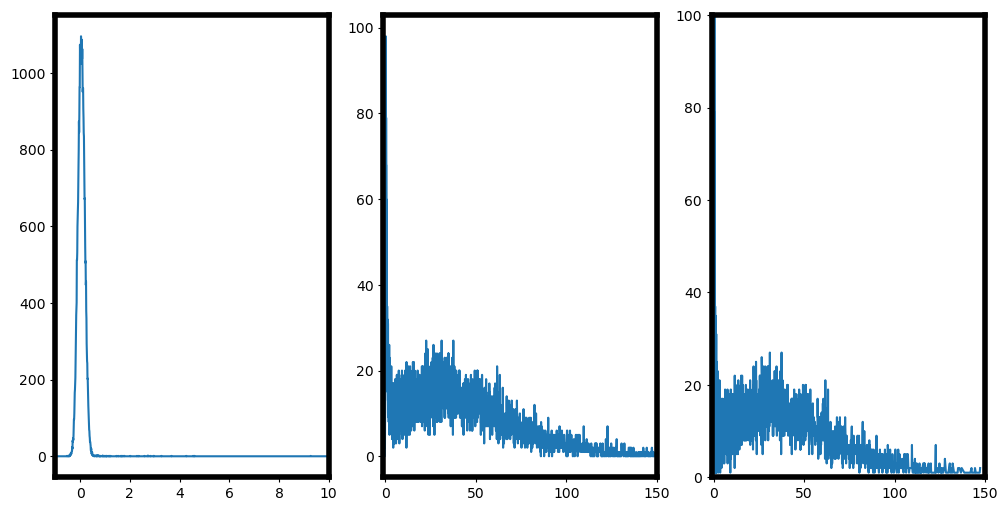

In [17]:
sheet_names = (pd.ExcelFile('Histograms_for_Pareto.xlsx')).sheet_names
xls = pd.ExcelFile('Histograms_for_Pareto.xlsx')
CAR_frac = 0.75
df_WT = (xls.parse(sheet_names[8]))[['MFI', 'Count']]
df0 = df_WT.sample(frac=1-CAR_frac, random_state=0)
df_CAR = (xls.parse(sheet_names[6]))[['MFI', 'Count']]
df1 = df_CAR.sample(frac=CAR_frac, random_state=0)
df = (pd.concat([df0,df1])).sort_values(by='MFI',ignore_index=True)
df = df.reset_index()
df = df[(df['MFI']>0) & (df['MFI']<150)]
CAR_MFI = adding_prob_dens(df)
print(len(CAR_MFI))
CAR_MFI = CAR_MFI[CAR_MFI['Count']>0]
print(len(CAR_MFI))
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize = (12,6))
ax0.plot(df_WT['MFI'],df_WT['Count'])
ax0.set_xlim(-1,10)
ax1.plot(df_CAR['MFI'],df_CAR['Count'])
ax1.set_xlim(-1,150)
ax2.plot(CAR_MFI['MFI'],CAR_MFI['Count'])
ax2.set_xlim(-1,150)
ax2.set_ylim(0,100)
plt.show()

155834.15567941155
156027.96824952308
151193.81139173813
157463.7350131832
155386.24113991827
155186.22637515253
152408.61384715358
151865.24882619386
150581.3299349668
148258.30907386634
148298.3788454056
146223.3219647307
142836.6920854149
144575.0102781865
142475.55856466386
138851.07142568432
138969.2199391856
137841.25156029372
134422.7918969545
133607.40126129732
129809.08241156451
131567.39479498367
128457.97647401088
125187.5974539589
126833.13788175838
125984.4507375002
125773.35266300057
123851.66080984229
125207.53591217106
125561.1889262728
126003.29629844497
124893.42884722436
124081.59516232388
123180.90914381813
122241.77323573706
122403.6100697185
125374.9042562551
123879.88770798098
121802.76097562356
121148.86569640247
122322.77328971103
120516.15335090354
119573.63417423502
120297.9169166688
119802.55746138835
118972.08073069729
118663.43469810268
120491.28342726982
118307.1850422232
118489.1577773174
121066.5967322401
119365.90004520962
118934.84390584793
118028.680

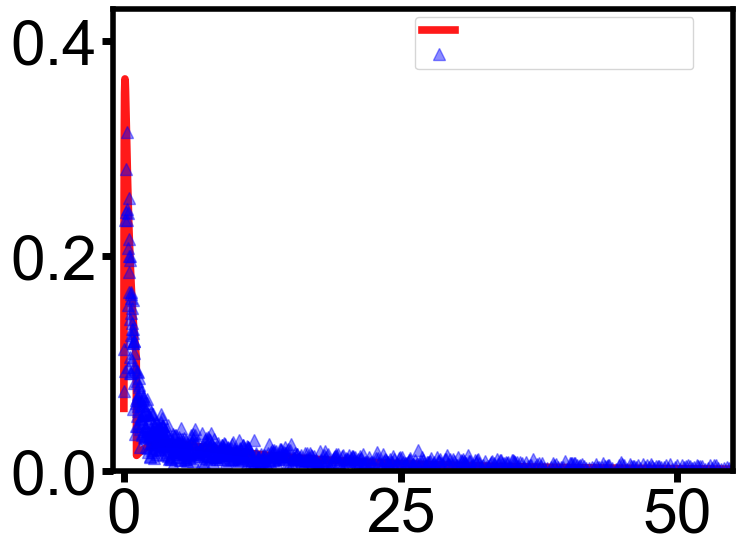

In [28]:
lim1, lim2, lim3 = CAR_MFI['MFI'].min(), 1.14, CAR_MFI['MFI'].max()
num = CAR_MFI['MFI'].values
num = np.insert(num,0,0)
step = 2
num_indx = (np.linspace(0,len(num)-1,int(len(num)/step))).astype(int)
nmbr = []
for i in num_indx:
    nmbr.append(num[i])
num = np.array(nmbr)
x = (num[1:]+num[:-1])/2
bin_range = num
size = CAR_MFI['Count'].sum()

lb1, ub1 = lim1, lim2
lb2, ub2 = lim2, lim3

e_num = np.repeat(CAR_MFI['MFI'].values,CAR_MFI['Count'].values)
count = np.array([np.sum((e_num > num[i]) & (e_num <= num[i+1])) for i in range(len(num)-1)])


def log_likelihood(params):
    mu1, sigma1, mu2, sigma2, w = params
    p1 = lognorm.pdf(x, sigma1, scale=np.exp(mu1))
    p2 = lognorm.pdf(x, sigma2, scale=np.exp(mu2))
    p1[(x < lb1) | (x > ub1)] = 0
    p2[(x < lb2) | (x > ub2)] = 0
    likelihood = (1 - w) * p1 + w * p2
    likelihood = -np.sum(count * np.log(likelihood))
    print(likelihood)
    return likelihood
# Optimization
initial_guess = [0.1, 0.8, 3.1, 0.99, 0.35]
bounds = [(0.01, 1.5), (0.1, 1.5), (1, 6), (0.1, 2), (0.3, 0.55)]
result = minimize(log_likelihood, initial_guess, method='Nelder-Mead', bounds=bounds)
params = result.x
print(params.tolist())
mu1, sigma1, mu2, sigma2, w = params

print(f"mu1: {mu1}, sigma1: {sigma1}, mu2: {mu2}, sigma2: {sigma2}, w:{w}")

plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 4
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
# Plotting the results
x_values = x #np.linspace(min(x), max(x), num=1000)
p1_fitted = lognorm.pdf(x_values, sigma1, scale=np.exp(mu1))
p2_fitted = lognorm.pdf(x_values, sigma2, scale=np.exp(mu2))
p1_fitted[(x_values < lb1) | (x_values > ub1)] = 0
p2_fitted[(x_values < lb2) | (x_values > ub2)] = 0
mixture_fitted = (1 - w) * p1_fitted + w * p2_fitted
pdf = count/(sum(count)*(bin_range[1:]-bin_range[:-1]))
plt.plot(x_values, mixture_fitted, label='Fitted Mixture Distribution', color='red',alpha=0.9,lw =5.5)
plt.plot(x,pdf,'^',markersize = 8,color='blue',alpha=0.45, label='Data')
#plt.hist(x, bins=bin_range, density=True, weights=count, label='Data',color='blue')
#plt.plot(x_values, p1_fitted, label='Fitted Lognormal Distribution p1', color='red')
#plt.plot(x_values, p2_fitted, label='Fitted Lognormal Distribution p2', color='blue')
t_size = 45
plt.xticks([0,25,50],fontname="Arial",fontsize = t_size)
plt.yticks([0.0,0.2,0.40],fontname="Arial",fontsize = t_size)
plt.xlim(-1,55)
plt.ylim(0,0.43)
#plt.xlabel('x')
#plt.ylim(0,0.4)
#plt.ylabel('Density')
plt.legend()
#plt.title('Fitted Mixture of Two Lognormal Distributions with Truncation')
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=12, loc='upper right', labelcolor='white')
plt.show()

2668
2569


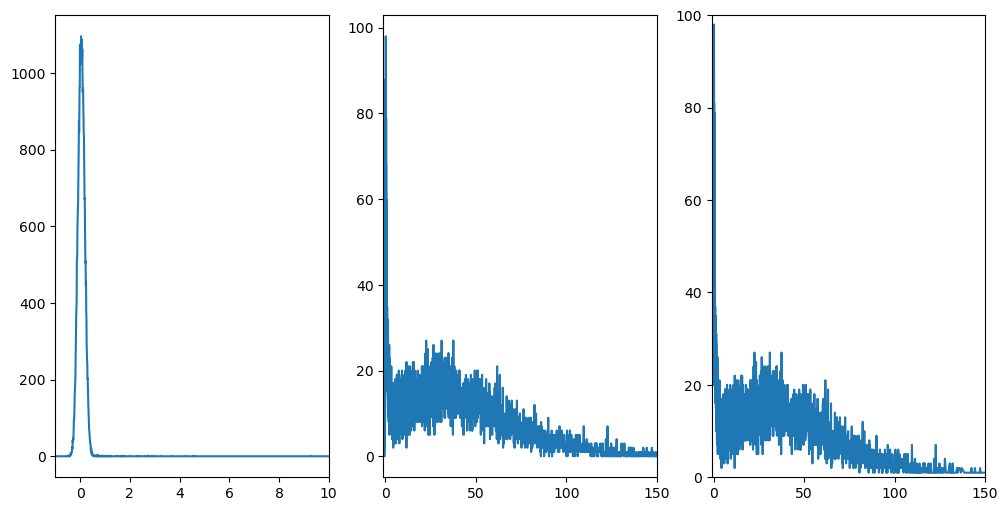

In [5]:
sheet_names = (pd.ExcelFile('Histograms_for_Pareto.xlsx')).sheet_names
xls = pd.ExcelFile('Histograms_for_Pareto.xlsx')
CAR_frac = 0.99
df_WT = (xls.parse(sheet_names[8]))[['MFI', 'Count']]
df0 = df_WT.sample(frac=1-CAR_frac, random_state=0)
df_CAR = (xls.parse(sheet_names[6]))[['MFI', 'Count']]
# df1 = df_CAR.sample(frac=CAR_frac, random_state=0)
# df = (pd.concat([df0,df1])).sort_values(by='MFI',ignore_index=True)
df = df_CAR
df = df.reset_index()
df = df[(df['MFI']>0) & (df['MFI']<150)]
CAR_MFI = adding_prob_dens(df)
print(len(CAR_MFI))
CAR_MFI = CAR_MFI[CAR_MFI['Count']>0]
print(len(CAR_MFI))
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize = (12,6))
ax0.plot(df_WT['MFI'],df_WT['Count'])
ax0.set_xlim(-1,10)
ax1.plot(df_CAR['MFI'],df_CAR['Count'])
ax1.set_xlim(-1,150)
ax2.plot(CAR_MFI['MFI'],CAR_MFI['Count'])
ax2.set_xlim(-1,150)
ax2.set_ylim(0,100)
plt.show()

140836.42886515494
140849.4359051244
140629.37204317632
141935.08843404945
141303.86010280633
140518.26815870032
140012.16101164004
139552.75360481715
139452.683788569
138647.0667889772
139117.1057894419
138653.70510218875
138444.62343537377
138535.14503349498
138039.73432336817
138444.53383742363
137627.89451110625
137300.9467602402
137332.9098018321
137141.42845135284
137323.379324008
138115.6914671766
137321.50300308398
137417.2142469617
137834.859178064
137099.7324899853
138296.66697290802
137054.13342406653
137112.77306996397
138050.70302101388
136973.25782294877
136940.99440539535
137393.9316692577
137201.29485224502
136968.5514592998
137114.07576766127
136947.57945261145
136897.85040939075
137102.0635492761
137418.4151819634
136897.4377134881
136870.6524254029
136969.7196567265
136783.6939523229
136788.25679807249
136973.342012711
136853.2105291055
136935.17903473723
136856.50563786124
136935.80237890052
136842.70847693412
136803.27045734244
136790.06984581536
136905.82262838073

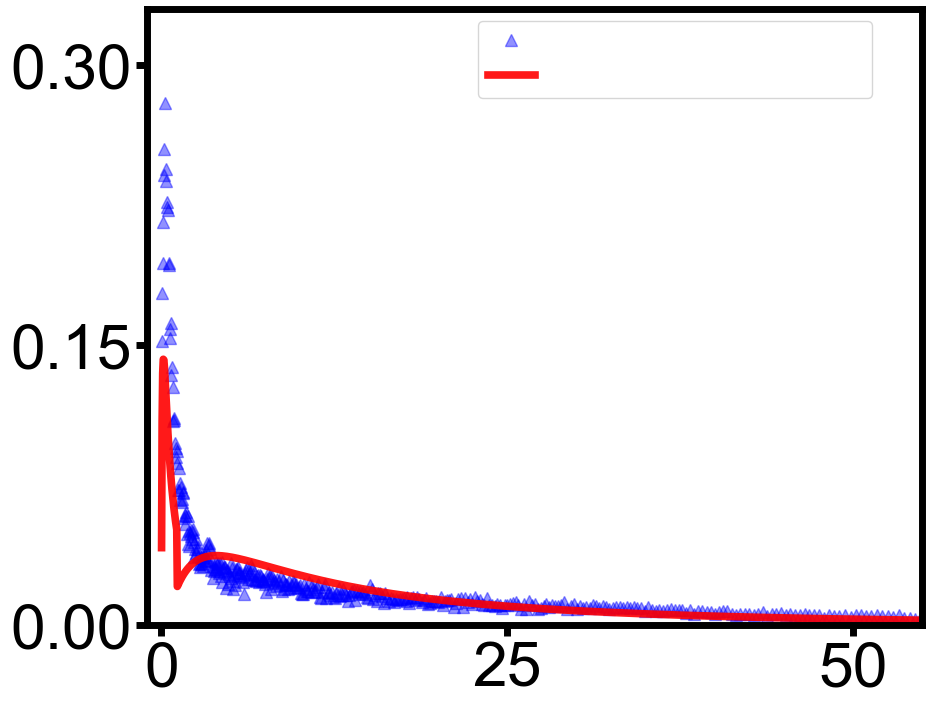

In [6]:
lim1, lim2, lim3 = CAR_MFI['MFI'].min(), 1.14, CAR_MFI['MFI'].max()
num = CAR_MFI['MFI'].values
num = np.insert(num,0,0)
step = 5
num_indx = (np.linspace(0,len(num)-1,int(len(num)/step))).astype(int)
nmbr = []
for i in num_indx:
    nmbr.append(num[i])
num = np.array(nmbr)
x = (num[1:]+num[:-1])/2
bin_range = num
size = CAR_MFI['Count'].sum()

lb1, ub1 = lim1, lim2
lb2, ub2 = lim2, lim3

e_num = np.repeat(CAR_MFI['MFI'].values,CAR_MFI['Count'].values)
count = np.array([np.sum((e_num > num[i]) & (e_num <= num[i+1])) for i in range(len(num)-1)])


def log_likelihood(params):
    mu1, sigma1, mu2, sigma2, w = params
    p1 = lognorm.pdf(x, sigma1, scale=np.exp(mu1))
    p2 = lognorm.pdf(x, sigma2, scale=np.exp(mu2))
    p1[(x < lb1) | (x > ub1)] = 0
    p2[(x < lb2) | (x > ub2)] = 0
    likelihood = (1 - w) * p1 + w * p2
    likelihood = -np.sum(count * np.log(likelihood))
    print(likelihood)
    return likelihood
# Optimization
initial_guess = np.array([0.04131501, 1.05464126, 3.1699362 , 1.50408986, 0.73977892])
bounds = [(0.01, 0.1), (0.1, 1.5), (1, 5), (1, 15), (0.5, 0.9)]
result = minimize(log_likelihood, initial_guess, method='Nelder-Mead', bounds=bounds)
params = result.x
print(params.tolist())
#params = np.array([0.04131501, 1.05464126, 3.1699362 , 1.50408986, 0.73977892])
mu1, sigma1, mu2, sigma2, w = params

print(f"mu1: {mu1}, sigma1: {sigma1}, mu2: {mu2}, sigma2: {sigma2}, w:{w}")

plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 5
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
# Plotting the results
x_values = x #np.linspace(min(x), max(x), num=1000)
p1_fitted = lognorm.pdf(x_values, sigma1, scale=np.exp(mu1))
p2_fitted = lognorm.pdf(x_values, sigma2, scale=np.exp(mu2))
p1_fitted[(x_values < lb1) | (x_values > ub1)] = 0
p2_fitted[(x_values < lb2) | (x_values > ub2)] = 0
mixture_fitted = (1 - w) * p1_fitted + w * p2_fitted
#plt.hist(x, bins=bin_range, density=True, weights=count, label='Data',color='blue')
pdf = count/(sum(count)*(bin_range[1:]-bin_range[:-1]))
#plt.hist(x, bins=bin_range, density=True, weights=count, label='Data', color = 'blue')
plt.plot(x,pdf,'^',markersize = 8,color='blue',alpha=0.43, label='Data')
plt.plot(x_values, mixture_fitted, label='Fitted Mixture Distribution', color='red',alpha=0.9,lw =5.5)
#plt.plot(x,pdf,'^',markersize = 3,color='blue', label='Data')
#plt.plot(x_values, p1_fitted, label='Fitted Lognormal Distribution p1', color='red')
#plt.plot(x_values, p2_fitted, label='Fitted Lognormal Distribution p2', color='blue')
#plt.plot(x_values, mixture_fitted, label='Fitted Mixture Distribution', color='orange',lw =5)
t_size = 45
plt.xticks([0,25,50],fontname="Arial",fontsize = t_size)
plt.yticks([0.0,0.15,0.30],fontname="Arial",fontsize = t_size)
plt.xlim(-1,55)
plt.ylim(0,0.33)
#plt.xlabel('x')
#plt.ylim(0,0.4)
#plt.ylabel('Density')
plt.legend()
#plt.title('Fitted Mixture of Two Lognormal Distributions with Truncation')
plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.show()

In [ ]:
np.array([0.04131501, 1.05464126, 3.1699362 , 1.50408986, 0.73977892])